In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

# Import the data

In [2]:
#Read the files
col_names=['sepal length','sepal width','petal length','petal width','output']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col_names, header=None,skipinitialspace=True)

In [3]:
print(df.describe())
print('----------------------------------------------------------')
print(df.info())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
output          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


# Check for correlation. Get X and y variables from dataset

In [4]:
corrMatrix = df.corr()
print (corrMatrix)

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


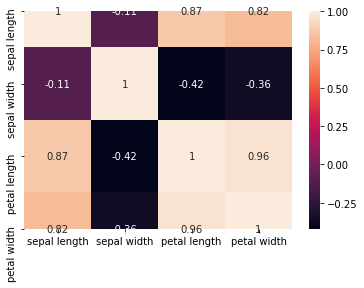

In [5]:
sn.heatmap(corrMatrix, annot=True)

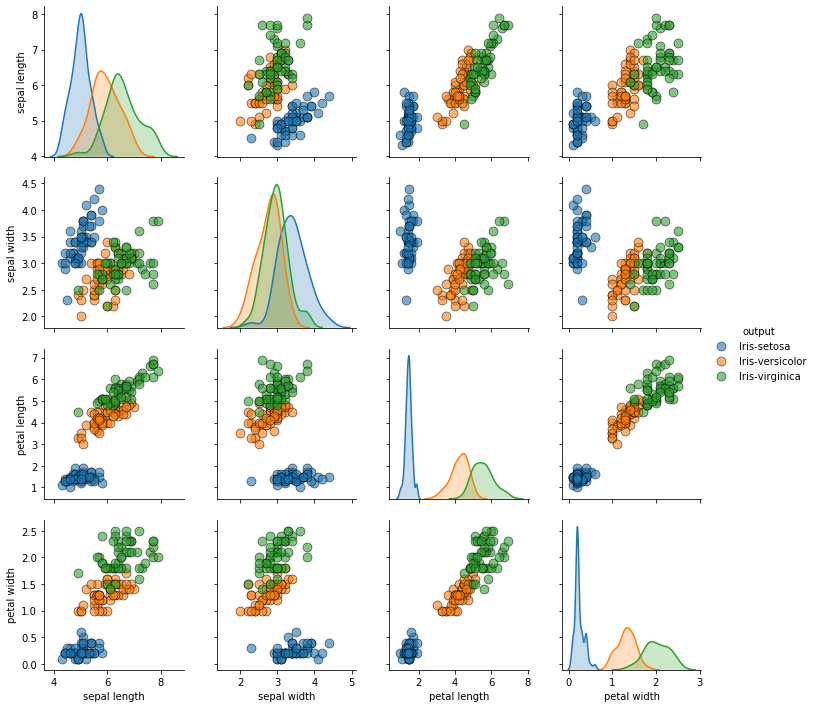

In [6]:
import seaborn as sns
sns.pairplot(df, hue = 'output', diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [7]:
x1=df.loc[:,'sepal length':'petal width']
y1=df["output"]

In [8]:
np.unique(y1)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Encode all categorical variables

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y1)

# Feature scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X = scaler.fit_transform(x1)

# Final X and y attributes

In [11]:
print(X[0:5])
print('----------------------------------------------------------')
print(y[0:5])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
----------------------------------------------------------
[0 0 0 0 0]


# Split the data provided into test and train

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify=y)

In [44]:
from keras.models import Sequential
from keras.layers import Dense

# Find the best possible hidden layer and nodes combination by running the model with different combination 

In [50]:
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(4, 3, 4, i, 'model_{}'.format(i))for i in range(1, 4)]

for create_model in models:
    create_model().summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_91 (Dense)             (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_93 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_94 (Dense)             (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trai

In [51]:
from keras.callbacks import TensorBoard

history_dict = {}
cb = TensorBoard()
for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train, batch_size=5,epochs=100, verbose=0,validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.5817601647641923
Test accuracy: 0.644444465637207
Model name: model_2
Test loss: 0.35494288206100466
Test accuracy: 0.9555555582046509
Model name: model_3
Test loss: 1.0986139429940118
Test accuracy: 0.3333333432674408


# Apply keras to construct a neural network

In [54]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax', name='output'))

In [55]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=5,epochs=100,verbose=1,validation_data=(X_test, y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s 937us/step - loss: 1.1020 - accuracy: 0.3333 - val_loss: 1.1002 - val_accuracy: 0.3333
Epoch 2/100
105/105 [==============================] - 0s 209us/step - loss: 1.0979 - accuracy: 0.3333 - val_loss: 1.0980 - val_accuracy: 0.3333
Epoch 3/100
105/105 [==============================] - 0s 212us/step - loss: 1.0955 - accuracy: 0.3333 - val_loss: 1.0961 - val_accuracy: 0.3333
Epoch 4/100
105/105 [==============================] - 0s 205us/step - loss: 1.0931 - accuracy: 0.3333 - val_loss: 1.0936 - val_accuracy: 0.3333
Epoch 5/100
105/105 [==============================] - 0s 211us/step - loss: 1.0899 - accuracy: 0.3333 - val_loss: 1.0906 - val_accuracy: 0.3333
Epoch 6/100
105/105 [==============================] - 0s 163us/step - loss: 1.0863 - accuracy: 0.3333 - val_loss: 1.0869 - val_accuracy: 0.3333
Epoch 7/100
105/105 [==============================] - 0s 173us/step - loss: 1.0819 -

Epoch 57/100
105/105 [==============================] - 0s 154us/step - loss: 0.5647 - accuracy: 0.8952 - val_loss: 0.5864 - val_accuracy: 0.8000
Epoch 58/100
105/105 [==============================] - 0s 159us/step - loss: 0.5572 - accuracy: 0.8952 - val_loss: 0.5786 - val_accuracy: 0.8667
Epoch 59/100
105/105 [==============================] - 0s 188us/step - loss: 0.5492 - accuracy: 0.8952 - val_loss: 0.5713 - val_accuracy: 0.8000
Epoch 60/100
105/105 [==============================] - 0s 155us/step - loss: 0.5414 - accuracy: 0.8952 - val_loss: 0.5639 - val_accuracy: 0.8444
Epoch 61/100
105/105 [==============================] - 0s 168us/step - loss: 0.5349 - accuracy: 0.8952 - val_loss: 0.5570 - val_accuracy: 0.8667
Epoch 62/100
105/105 [==============================] - 0s 168us/step - loss: 0.5281 - accuracy: 0.8952 - val_loss: 0.5499 - val_accuracy: 0.9556
Epoch 63/100
105/105 [==============================] - 0s 190us/step - loss: 0.5213 - accuracy: 0.9048 - val_loss: 0.5434 -

# Get the accuracy of the model on test data

In [56]:
loss,accuracy=model.evaluate(X_test, y_test, verbose=1)
print('Loss: %.2f' % (loss))
print('Accuracy: %.2f' % (accuracy*100))

45/45 [==============================] - 0s 51us/step
Loss: 0.39
Accuracy: 97.78
